<a href="https://colab.research.google.com/github/ViniciusNarcisoFernandes/hydrogen-atom/blob/main/%C3%81tomo_de_Hidrog%C3%AAnio_Solu%C3%A7%C3%A3o_em_S%C3%A9ries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

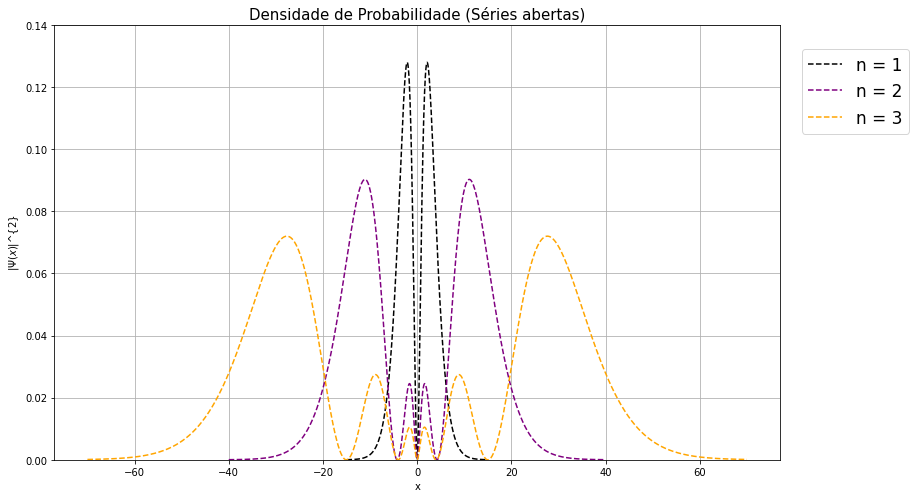

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

# Massa do elétron (kg):
m_e = 9.10938e-31

# Carga elétrica ([C]):
e = 1.60218e-19

# hcortado([eV].[s]):
hbar = 6.582397003745317e-16

# Permissividade do vácuo ([C]^(2)/[A].[eV]):
eps0 = 1.4177699999999998e-40

# Conversão:
f= 1.602e+1

# Valor de N:
N = 1000

# Valor de l (Raio de Bohr):
a = 4*f*np.pi*eps0*np.power((hbar/e),2)/m_e
l = 2/a

# Função de Onda 1:
def psi1(x):
  return (1/2)*np.power((l/4),(3/2))*np.exp(-(l/4)*np.abs(x)/2)*np.abs(x)

# Função de Onda 2:
def psi2(x):
  return (1/4*np.sqrt(2))*np.power((l/4),(3/2))*np.exp(-(l/4)*np.abs(x)/4)*(np.abs(x)-(l/(4*4))*np.power(np.abs(x),2))

# Função de Onda 3:
def psi3(x):
  return ((1/6)*np.sqrt(3))*np.power((l/4),(3/2))*np.exp(-(l/4)*np.abs(x)/6)*(np.abs(x)-((l/(4*3))*(np.power(np.abs(x),2)))+(np.power((l/4),2)/54)*np.power(np.abs(x),3))

# Número Quântico principal:
n1 = 1 ; n2 = 2 ; n3 = 3

# X variando:
xx1 = np.linspace(-15,15,N)
xx2 = np.linspace(-40,40,N)
xx3 = np.linspace(-70,70,N)

# Funções em séries:
Psi1 = psi1(xx1)
Psi2 = psi2(xx2)
Psi3 = psi3(xx3)

# Plot:
plt.figure(figsize=(13,8))

# Plot (n = 1):
plt.plot(xx1,(Psi1*Psi1)/n1,linestyle='--',color='black',label='n = 1')

# Plot (n = 2):
plt.plot(xx2,(Psi2*Psi2)/n2,linestyle='--',color='purple',label='n = 2')

# Plot (n = 3):
plt.plot(xx3,(Psi3*Psi3)/n3,linestyle='--',color='orange',label='n = 3')

# Configurações do Plot:
plt.title('Densidade de Probabilidade (Séries abertas)',fontsize=15)
plt.xlabel('x')
plt.ylabel('$|\Psi(x)$|^{2}')
plt.grid(True)
plt.ylim([0,0.14])
plt.legend(loc=(1.03,0.75),fontsize=17)
plt.show()

Átomo de Hidrogênio - Solução Numérica

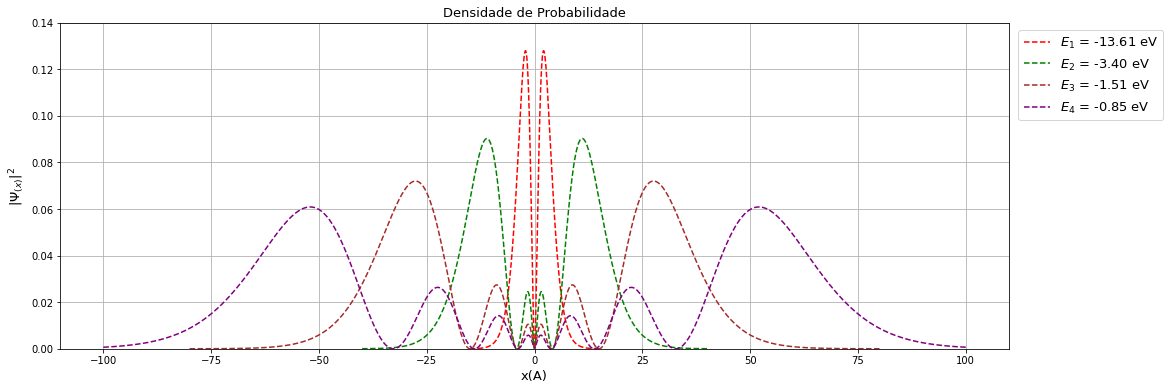

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

# Massa do elétron (kg):
m_e = 9.10938e-31

# Carga elétrica ([C]):
e = 1.60218e-19

# hcortado([eV].[s]):
hbar = 6.582397003745317e-16

# Permissividade do vácuo ([C]^(2)/[A].[eV]):
eps0 = 1.4177699999999998e-40

# Conversão:
f= 1.602e+1

# Valor de N:
N = 1000

# Valor de l (Raio de Bohr):
a0 = 4*f*np.pi*eps0*np.power((hbar/e),2)/m_e
l = 2/a0

# Valores de n (1,2,3,4):
n11 = 1 ; n22 = 2 ; n33 = 3 ; n44 = 4

# X positivo:
def Xright(l,n,xrr):

  # Valor inicial: de xr e passo:
  xr = xrr ; xmatch = 0 ; hr = (xmatch-xr)/N

  # Constante de Normalização:
  C1 = (1/2)*np.sqrt(np.power((l/n),3))

  # Lista Xpositivo:
  psir = np.zeros([N])

  # Solução X positivo:
  for i in np.arange(N):
    if (n == 1):
      psir[i] = C1*np.exp(-(l*xr)/(2*n))*xr
      xr = xr + hr
    if (n != 1):
      Somar = 0 ; Prod = 1
      for m in np.arange(1,n):
        Prod = Prod * (l*(m-n))/(n*m*(m+1))
        Somar = Somar + (np.power(xr,(m+1))*Prod)
      psir[i] = C1*n*np.exp(-(l*xr)/(2*n))*(xr + Somar)
      xr = xr + hr
  return psir

# X negativo:
def Xleft(l,n,xll):

  # Valor inicial de xr e passo:
  xl = -xll ; xmatch = 0 ; hl = (xmatch-xl)/N

  # Constante de Normalização:
  D1 = -(1/2)*np.sqrt(np.power((l/n),3))

  # Lista Xnegativo:
  psil = np.zeros([N])

  # Solução:
  for i in np.arange(N):
    if (n == 1):
      psil[i] = D1*np.exp((l*xl)/(2*n))*xl
      xl = xl + hl
    if (n != 1):
      Somal = 0 ; Prod = 1
      for m in np.arange(1,n):
        Prod = Prod * (l*(n-m))/(n*m*(m+1))
        Somal = Somal + (np.power(xl,(m+1))*Prod)
      psil[i] = D1*n*np.exp((l*xl)/(2*n))*(xl + Somal)
      xl = xl + hl
  return psil

# Energias(E):
E1 = -4*np.power((l*hbar/n11),2)/(2*m_e)
E2 = -4*np.power((l*hbar/n22),2)/(2*m_e)
E3 = -4*np.power((l*hbar/n33),2)/(2*m_e)
E4 = -4*np.power((l*hbar/n44),2)/(2*m_e)

# Funções (n = 1):
Psir1 = Xright(l/4, n11 ,xrr = 15)
Psil1 = Xleft(l/4, n11 ,xll = 15)

# Funções (n = 2):
Psir2 = Xright(l/4, n22 ,xrr = 40)
Psil2 = Xleft(l/4, n22 ,xll = 40)

# Funções (n = 3):
Psir3 = Xright(l/4, n33 ,xrr = 80)
Psil3 = Xleft(l/4, n33 ,xll = 80)

# Funções (n = 4):
Psir4 = Xright(l/4, n44 ,xrr = 100)
Psil4 = Xleft(l/4, n44 ,xll = 100)

# X variando (n = 1):
xr1 = np.linspace(15,0,N)
xl1 = np.linspace(-15,0,N)

# X variando (n = 2):
xr2 = np.linspace(40,0,N)
xl2 = np.linspace(-40,0,N)

# X variando (n = 3):
xr3 = np.linspace(80,0,N)
xl3 = np.linspace(-80,0,N)

# X variando (n = 4):
xr4 = np.linspace(100,0,N)
xl4 = np.linspace(-100,0,N)

# Plot:
plt.figure(figsize=(17,6))

# Plot (n = 1):
plt.plot(xr1,(Psir1*Psir1)/n11,linestyle='--',color='red',label=f'$E_{1}$ = {E1:.2f} eV')
plt.plot(xl1,(Psil1*Psir1)/n11,linestyle='--',color='red',)

# Plot (n = 2):
plt.plot(xr2,(Psir2*Psir2)/n22,linestyle='--',color='green',label=f'$E_{2}$ = {E2:.2f} eV')
plt.plot(xl2,(Psil2*Psir2)/n22,linestyle='--',color='green')

# Plot (n = 3)
plt.plot(xr3,(Psir3*Psir3)/n33,linestyle='--',color='brown',label=f'$E_{3}$ = {E3:.2f} eV')
plt.plot(xl3,(Psil3*Psir3)/n33,linestyle='--',color='brown')

# Plot (n = 4)
plt.plot(xr4,(Psir4*Psir4)/n44,linestyle='--',color='purple',label=f'$E_{4}$ = {E4:.2f} eV')
plt.plot(xl4,(Psil4*Psir4)/n44,linestyle='--',color='purple')

# Configurações do Plot:
plt.title('Densidade de Probabilidade', fontsize = 13)
plt.xlabel('x(A)',fontsize=13)
plt.ylabel('$|\Psi_{(x)}|^{2}$',fontsize=13)
plt.ylim([0,0.14])
plt.grid(True)
plt.legend(loc=(1.01,0.70),fontsize=13)
plt.show();

Plot ( n = 1 )

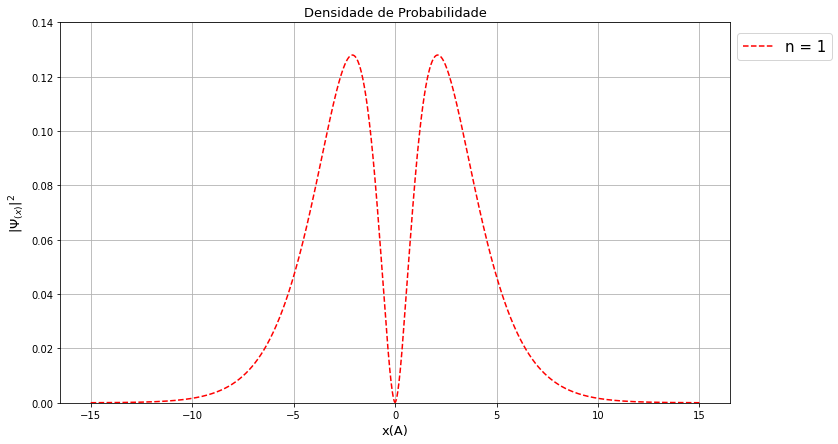

In [ ]:
# Plot:
plt.figure(figsize=(12,7))

# Plot (n = 1):
plt.plot(xr1,(Psir1*Psir1)/n11,linestyle='--',color='red',label='n = 1')
plt.plot(xl1,(Psil1*Psir1)/n11,linestyle='--',color='red',)

# Configurações do Plot:
plt.title('Densidade de Probabilidade', fontsize = 13)
plt.xlabel('x(A)',fontsize=13)
plt.ylabel('$|\Psi_{(x)}|^{2}$',fontsize=13)
plt.ylim([0,0.14])
plt.grid(True)
plt.legend(loc=(1.01,0.9),fontsize=15)
plt.show()

Plot ( n = 2 )

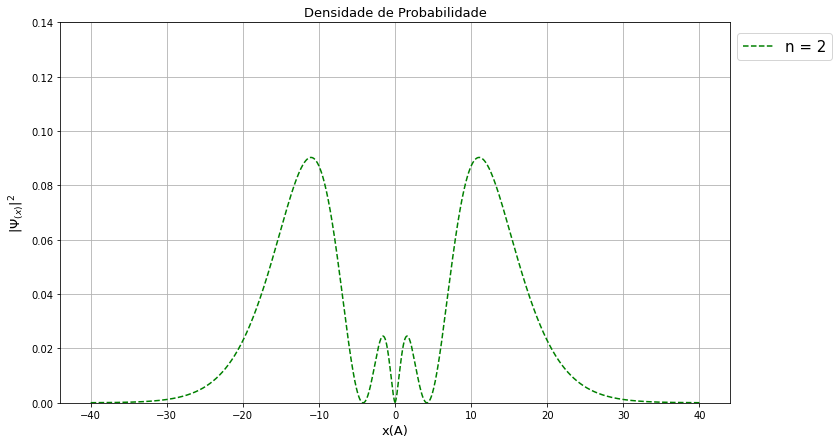

In [ ]:
# Plot:
plt.figure(figsize=(12,7))

# Plot (n = 2):
plt.plot(xr2,(Psir2*Psir2)/n22,linestyle='--',color='green',label='n = 2')
plt.plot(xl2,(Psil2*Psir2)/n22,linestyle='--',color='green')

# Configurações do Plot:
plt.title('Densidade de Probabilidade', fontsize = 13)
plt.xlabel('x(A)',fontsize=13)
plt.ylabel('$|\Psi_{(x)}|^{2}$',fontsize=13)
plt.ylim([0,0.14])
plt.grid(True)
plt.legend(loc=(1.01,0.9),fontsize=15)
plt.show()

Plot ( n = 3 )

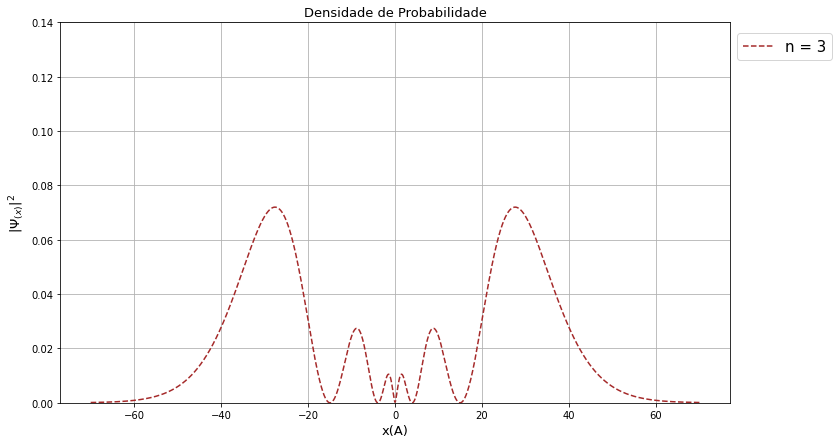

In [ ]:
# Plot:
plt.figure(figsize=(12,7))

# Plot (n = 3)
plt.plot(xr3,(Psir3*Psir3)/n33,linestyle='--',color='brown',label='n = 3')
plt.plot(xl3,(Psil3*Psir3)/n33,linestyle='--',color='brown')

# Configurações do Plot:
plt.title('Densidade de Probabilidade', fontsize = 13)
plt.xlabel('x(A)',fontsize=13)
plt.ylabel('$|\Psi_{(x)}|^{2}$',fontsize=13)
plt.ylim([0,0.14])
plt.grid(True)
plt.legend(loc=(1.01,0.9),fontsize=15)
plt.show()

Plot ( n = 4 )

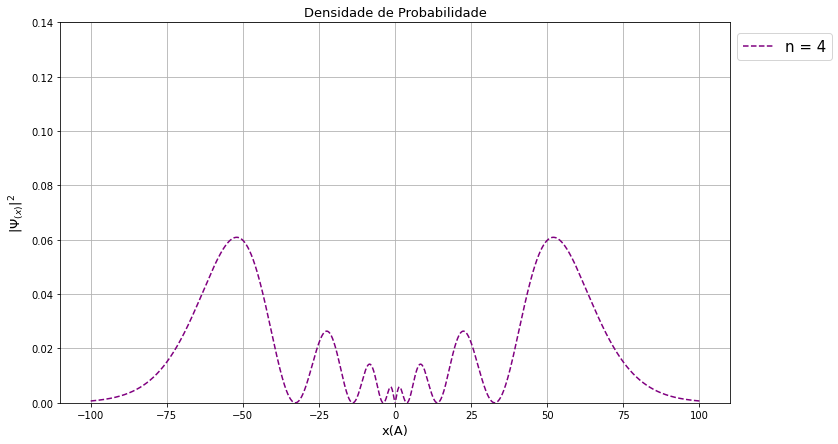

In [ ]:
# Plot:
plt.figure(figsize=(12,7))

# Plot (n = 4)
plt.plot(xr4,(Psir4*Psir4)/n44,linestyle='--',color='purple',label='n = 4')
plt.plot(xl4,(Psil4*Psir4)/n44,linestyle='--',color='purple')

# Configurações do Plot:
plt.title('Densidade de Probabilidade', fontsize = 13)
plt.xlabel('x(A)',fontsize=13)
plt.ylabel('$|\Psi_{(x)}|^{2}$',fontsize=13)
plt.ylim([0,0.14])
plt.grid(True)
plt.legend(loc=(1.01,0.9),fontsize=15)
plt.show()